### Data Loading and Processing 

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

dataset_path = 'D:/Lokesh_projects_Capstone/MOP-Code/artificial-intelligence/Vehicle Classification/datasets/'

datagen = ImageDataGenerator(rescale=1./255) 

data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),      
    batch_size=32,               
    class_mode='categorical',  
    shuffle=True
)

Found 3130 images belonging to 13 classes.


In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

save_path = 'D:/Lokesh_projects_Capstone/MOP-Code/artificial-intelligence/Vehicle Classification/processed_images/'

if not os.path.exists(save_path):
    os.makedirs(save_path)

img_count = 0
for images, labels in data:
    for i in range(images.shape[0]):
        img = images[i] * 255.0  
        img = img.astype(np.uint8)  
        pil_img = array_to_img(img)

        class_index = np.argmax(labels[i])
        class_name = list(data.class_indices.keys())[class_index]

        class_dir = os.path.join(save_path, class_name)
        os.makedirs(class_dir, exist_ok=True)

        img_path = os.path.join(class_dir, f'image_{img_count}.png')
        pil_img.save(img_path)
        img_count += 1

    if img_count >= data.samples:
        break

print(f"Saved {img_count} resized and normalized images to: {save_path}")


C:\Users\lokesh r\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Saved 3130 resized and normalized images to: D:/Lokesh_projects_Capstone/MOP-Code/artificial-intelligence/Vehicle Classification/processed_images/


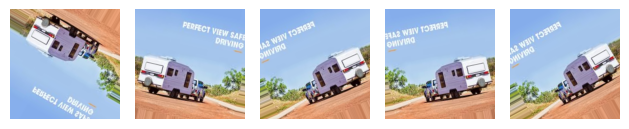

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

images, labels = next(data)  

sample_image = images[0] 

sample_image = np.expand_dims(sample_image, axis=0)

aug_gen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True
)
aug_iter = aug_gen.flow(sample_image, batch_size=1)

aug_save_path = 'D:/Lokesh_projects_Capstone/MOP-Code/artificial-intelligence/Vehicle Classification/saved_data/augmented_demo/'
os.makedirs(aug_save_path, exist_ok=True)

for i in range(5):
    aug_img = next(aug_iter)[0]  
    img = array_to_img(aug_img)  
    img.save(os.path.join(aug_save_path, f'augmented_{i+1}.jpg'))

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()